<a href="https://colab.research.google.com/github/bonsoirpedro/TelecomX_BR/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#üìå Extrac√£o

In [53]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

import pandas as pd
df = pd.read_json(url)
df.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

#üîß Transforma√ß√£o

In [54]:
dados = df.to_dict(orient='records')
df_normalizado = pd.json_normalize(dados)
df_normalizado.head()

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

In [55]:
# analisar inconsistencias , nulos e duplicados
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [56]:
df_normalizado.isnull().sum()

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

In [57]:
df_normalizado.isnull().mean() * 100

customerID                   0.0
Churn                        0.0
customer.gender              0.0
customer.SeniorCitizen       0.0
customer.Partner             0.0
customer.Dependents          0.0
customer.tenure              0.0
phone.PhoneService           0.0
phone.MultipleLines          0.0
internet.InternetService     0.0
internet.OnlineSecurity      0.0
internet.OnlineBackup        0.0
internet.DeviceProtection    0.0
internet.TechSupport         0.0
internet.StreamingTV         0.0
internet.StreamingMovies     0.0
account.Contract             0.0
account.PaperlessBilling     0.0
account.PaymentMethod        0.0
account.Charges.Monthly      0.0
account.Charges.Total        0.0
dtype: float64

In [58]:
df_normalizado[df_normalizado.isnull().any(axis=1)]

Empty DataFrame
Columns: [customerID, Churn, customer.gender, customer.SeniorCitizen, customer.Partner, customer.Dependents, customer.tenure, phone.PhoneService, phone.MultipleLines, internet.InternetService, internet.OnlineSecurity, internet.OnlineBackup, internet.DeviceProtection, internet.TechSupport, internet.StreamingTV, internet.StreamingMovies, account.Contract, account.PaperlessBilling, account.PaymentMethod, account.Charges.Monthly, account.Charges.Total]
Index: []

[0 rows x 21 columns]

In [59]:
df_normalizado.dropna(inplace=True)
df_normalizado.dropna(axis=1, inplace=True)

In [60]:
df_normalizado.fillna(0, inplace=True)
df_normalizado.fillna(method='ffill', inplace=True)

In [61]:
df_normalizado[df_normalizado.duplicated()]

Empty DataFrame
Columns: [customerID, Churn, customer.gender, customer.SeniorCitizen, customer.Partner, customer.Dependents, customer.tenure, phone.PhoneService, phone.MultipleLines, internet.InternetService, internet.OnlineSecurity, internet.OnlineBackup, internet.DeviceProtection, internet.TechSupport, internet.StreamingTV, internet.StreamingMovies, account.Contract, account.PaperlessBilling, account.PaymentMethod, account.Charges.Monthly, account.Charges.Total]
Index: []

[0 rows x 21 columns]

In [62]:
df_normalizado.drop_duplicates(inplace=True)

In [63]:
df_normalizado.dtypes

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object

In [64]:
df_normalizado.head(10)

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   
5  0013-MHZWF    No          Female                       0               No   
6  0013-SMEOE    No          Female                       1              Yes   
7  0014-BMAQU    No            Male                       0              Yes   
8  0015-UOCOJ    No          Female                       1               No   
9  0016-QLJIS    No          Female                       0              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   
5                 Yes                9                Yes                  No   
6                  No               71                Yes                  No   
7                  No               63                Yes                 Yes   
8                  No                7                Yes                  No   
9                 Yes               65                Yes                 Yes   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   
5                      DSL  ...                    No   
6              Fiber optic  ...                   Yes   
7              Fiber optic  ...                    No   
8                      DSL  ...                    No   
9                      DSL  ...                   Yes   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   
5                        No                  Yes                  Yes   
6                       Yes                  Yes                  Yes   
7                        No                  Yes                   No   
8                        No                   No                   No   
9                       Yes                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   
5                      Yes   Month-to-month                      Yes   
6                      Yes         Two year                      Yes   
7                       No         Two year                      Yes   
8                       No   Month-to-month                      Yes   
9                      Yes         Two year                      Yes   

     

In [65]:
colunas_booleanas = ['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
                     'phone.MultipleLines', 'internet.OnlineBackup', 'internet.DeviceProtection',
                     'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
                     'account.PaperlessBilling', 'internet.OnlineSecurity']

for col in colunas_booleanas:
    df_normalizado[col] = df_normalizado[col].map({'Yes': True, 'No': False})
    df_normalizado[col] = df_normalizado[col].astype('boolean')  # aceita True/False/NaN

In [66]:
df_normalizado['Churn'] = df_normalizado['Churn'].replace('nan', False)

In [67]:
colunas_strings = ['customerID', 'customer.gender', 'internet.InternetService',
                   'account.Contract', 'account.PaymentMethod']

for col in colunas_strings:
  df_normalizado[col] = df_normalizado[col].astype('string')

In [68]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   string 
 1   Churn                      7043 non-null   boolean
 2   customer.gender            7267 non-null   string 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   boolean
 5   customer.Dependents        7267 non-null   boolean
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   boolean
 8   phone.MultipleLines        6560 non-null   boolean
 9   internet.InternetService   7267 non-null   string 
 10  internet.OnlineSecurity    5686 non-null   boolean
 11  internet.OnlineBackup      5686 non-null   boolean
 12  internet.DeviceProtection  5686 non-null   boolean
 13  internet.TechSupport       5686 non-null   boole

In [69]:
print(df_normalizado['Churn'].unique())
print(df_normalizado['phone.MultipleLines'].unique())

<BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
<BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean


In [70]:
df_normalizado = df_normalizado.replace('nan', False)

In [71]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   string 
 1   Churn                      7043 non-null   boolean
 2   customer.gender            7267 non-null   string 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   boolean
 5   customer.Dependents        7267 non-null   boolean
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   boolean
 8   phone.MultipleLines        6560 non-null   boolean
 9   internet.InternetService   7267 non-null   string 
 10  internet.OnlineSecurity    5686 non-null   boolean
 11  internet.OnlineBackup      5686 non-null   boolean
 12  internet.DeviceProtection  5686 non-null   boolean
 13  internet.TechSupport       5686 non-null   boole

In [72]:
df_normalizado.dtypes

customerID                   string[python]
Churn                               boolean
customer.gender              string[python]
customer.SeniorCitizen                int64
customer.Partner                    boolean
customer.Dependents                 boolean
customer.tenure                       int64
phone.PhoneService                  boolean
phone.MultipleLines                 boolean
internet.InternetService     string[python]
internet.OnlineSecurity             boolean
internet.OnlineBackup               boolean
internet.DeviceProtection           boolean
internet.TechSupport                boolean
internet.StreamingTV                boolean
internet.StreamingMovies            boolean
account.Contract             string[python]
account.PaperlessBilling            boolean
account.PaymentMethod        string[python]
account.Charges.Monthly             float64
account.Charges.Total                object
dtype: object

In [73]:
import numpy as np

df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')

In [74]:
df_normalizado.head(10)

customerID  Churn customer.gender  customer.SeniorCitizen  \
0  0002-ORFBO  False          Female                       0   
1  0003-MKNFE  False            Male                       0   
2  0004-TLHLJ   True            Male                       0   
3  0011-IGKFF   True            Male                       1   
4  0013-EXCHZ   True          Female                       1   
5  0013-MHZWF  False          Female                       0   
6  0013-SMEOE  False          Female                       1   
7  0014-BMAQU  False            Male                       0   
8  0015-UOCOJ  False          Female                       1   
9  0016-QLJIS  False          Female                       0   

   customer.Partner  customer.Dependents  customer.tenure  phone.PhoneService  \
0              True                 True                9                True   
1             False                False                9                True   
2             False                False                4                True   
3              True                False               13                True   
4              True                False                3                True   
5             False                 True                9                True   
6              True                False               71                True   
7              True                False               63                True   
8             False                False                7                True   
9              True                 True               65                True   

   phone.MultipleLines internet.InternetService  ...  internet.OnlineBackup  \
0                False                      DSL  ...                   True   
1                 True                      DSL  ...                  False   
2                False              Fiber optic  ...                  False   
3                False              Fiber optic  ...                   True   
4                False              Fiber optic  ...                  False   
5                False                      DSL  ...                  False   
6                False              Fiber optic  ...                   True   
7                 True              Fiber optic  ...                  False   
8                False                      DSL  ...                  False   
9                 True                      DSL  ...                   True   

   internet.DeviceProtection  internet.TechSupport  internet.StreamingTV  \
0                      False                  True                  True   
1                      False                 False                 False   
2                       True                 False                 False   
3                       True                 False                  True   
4                      False                  True                  True   
5                      False                  True                  True   
6                       True                  True                  True   
7                      False                  True                 False   
8                      False                 False                 False   
9                       True                  True                  True   

   internet.StreamingMovies  account.Contract account.PaperlessBilling  \
0                     False          One year                     True   
1                      True    Month-to-month                    False   
2                     False    Month-to-month                     True   
3                      True    Month-to-month                     True   
4                     False    Month-to-month                     True   
5                      True    Month-to-month                     True   
6                      True          Two year                     True   
7                     False          Two year                     True   
8                     False    Mo

In [75]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   string 
 1   Churn                      7043 non-null   boolean
 2   customer.gender            7267 non-null   string 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   boolean
 5   customer.Dependents        7267 non-null   boolean
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   boolean
 8   phone.MultipleLines        6560 non-null   boolean
 9   internet.InternetService   7267 non-null   string 
 10  internet.OnlineSecurity    5686 non-null   boolean
 11  internet.OnlineBackup      5686 non-null   boolean
 12  internet.DeviceProtection  5686 non-null   boolean
 13  internet.TechSupport       5686 non-null   boole

In [76]:
(df_normalizado == 'nan').sum()

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: Int64

In [77]:
df_normalizado['ContaDiaria'] = df_normalizado['account.Charges.Monthly'] / 30
df_normalizado.head()

customerID  Churn customer.gender  customer.SeniorCitizen  \
0  0002-ORFBO  False          Female                       0   
1  0003-MKNFE  False            Male                       0   
2  0004-TLHLJ   True            Male                       0   
3  0011-IGKFF   True            Male                       1   
4  0013-EXCHZ   True          Female                       1   

   customer.Partner  customer.Dependents  customer.tenure  phone.PhoneService  \
0              True                 True                9                True   
1             False                False                9                True   
2             False                False                4                True   
3              True                False               13                True   
4              True                False                3                True   

   phone.MultipleLines internet.InternetService  ...  \
0                False                      DSL  ...   
1                 True                      DSL  ...   
2                False              Fiber optic  ...   
3                False              Fiber optic  ...   
4                False              Fiber optic  ...   

   internet.DeviceProtection  internet.TechSupport  internet.StreamingTV  \
0                      False                  True                  True   
1                      False                 False                 False   
2                       True                 False                 False   
3                       True                 False                  True   
4                      False                  True                  True   

   internet.StreamingMovies  account.Contract  account.PaperlessBilling  \
0                     False          One year                      True   
1                      True    Month-to-month                     False   
2                     False    Month-to-month                      True   
3                      True    Month-to-month                      True   
4                     False    Month-to-month                      True   

  account.PaymentMethod  account.Charges.Monthly account.Charges.Total  \
0          Mailed check                     65.6                593.30   
1          Mailed check                     59.9                542.40   
2      Electronic check                     73.9                280.85   
3      Electronic check                     98.0               1237.85   
4          Mailed check                     83.9                267.40   

   ContaDiaria  
0     2.186667  
1     1.996667  
2     2.463333  
3     3.266667  
4     2.796667  

[5 rows x 22 columns]

In [78]:
# tradu√ß√£o das colunas
df_normalizado = df_normalizado.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'cancelou',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'idoso',
    'customer.Partner': 'possui_parceiro',
    'customer.Dependents': 'possui_dependentes',
    'customer.tenure': 'meses_de_vinculo',
    'phone.PhoneService': 'servico_telefonico',
    'phone.MultipleLines': 'multiplas_linhas_telefonicas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'protecao_dispositivo',
    'internet.TechSupport': 'suporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_filmes',
    'internet.OnlineSecurity': 'seguranca_online',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'fatura_digital',
    'account.PaymentMethod': 'forma_pagamento',
    'account.Charges.Monthly': 'valor_mensal',
    'account.Charges.Total': 'valor_total'
})

In [79]:
mapeamento_ingles_portugues = {
    # tipo_contrato
    'Month-to-month': 'Mensal',
    'One year': 'Anual',
    'Two year': 'Bienal',

    # tipo_internet
    'DSL': 'DSL',
    'Fiber optic': 'Fibra √≥ptica',
    'No': 'Sem internet',

    # forma_pagamento
    'Mailed check': 'Boleto por Correio',
    'Electronic check': 'D√©bito autom√°tico',
    'Credit card (automatic)': 'Cart√£o autom√°tico',
    'Bank transfer (automatic)': 'Transfer√™ncia banc√°ria autom√°tica'
}


In [80]:
colunas_para_traduzir = ['tipo_contrato', 'tipo_internet', 'forma_pagamento']

for col in colunas_para_traduzir:
    df_normalizado[col] = df_normalizado[col].replace(mapeamento_ingles_portugues)

In [81]:
df_normalizado = df_normalizado.dropna()

#üìä Carga e an√°lise

In [82]:
df_normalizado.describe()

idoso  meses_de_vinculo  valor_mensal  valor_total  ContaDiaria
count  4832.000000       4832.000000   4832.000000  4832.000000  4832.000000
mean      0.204056         33.056705     81.761207  2902.470788     2.725374
std       0.403052         24.636200     18.306134  2415.564128     0.610204
min       0.000000          1.000000     42.900000    42.900000     1.430000
25%       0.000000          9.000000     69.787500   659.600000     2.326250
50%       0.000000         30.000000     82.500000  2350.625000     2.750000
75%       0.000000         56.000000     95.700000  4871.150000     3.190000
max       1.000000         72.000000    118.750000  8684.800000     3.958333

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [84]:
df_normalizado[df_normalizado['cancelou'] == True].head(20)

id_cliente  cancelou  genero  idoso  possui_parceiro  possui_dependentes  \
2    0004-TLHLJ      True    Male      0            False               False   
3    0011-IGKFF      True    Male      1             True               False   
4    0013-EXCHZ      True  Female      1             True               False   
18   0022-TCJCI      True    Male      1            False               False   
21   0023-XUOPT      True  Female      0             True               False   
41   0067-DKWBL      True    Male      1            False               False   
54   0093-XWZFY      True    Male      0            False               False   
55   0094-OIFMO      True  Female      1            False               False   
65   0107-YHINA      True    Male      0            False                True   
68   0112-QWPNC      True    Male      0             True               False   
72   0115-TFERT      True    Male      0             True               False   
77   0122-OAHPZ      True  Female      0            False               False   
79   0125-LZQXK      True    Male      0            False               False   
84   0133-BMFZO      True  Female      0            False               False   
86   0135-NMXAP      True  Female      0            False               False   
88   0137-OCGAB      True  Female      0            False               False   
94   0148-DCDOS      True    Male      0            False               False   
95   0151-ONTOV      True  Female      0            False               False   
97   0156-FVPTA      True    Male      0             True               False   
113  0193-ESZXP      True  Female      1             True               False   

     meses_de_vinculo  servico_telefonico  multiplas_linhas_telefonicas  \
2                   4                True                         False   
3                  13                True                         False   
4                   3                True                         False   
18                 45                True                         False   
21                 13                True                          True   
41                  2                True                         False   
54                 40                True                          True   
55                 11                True                         False   
65                  1                True                          True   
68                 49                True                          True   
72                 21                True                          True   
77                  7                True                          True   
79                 15                True                         False   
84                  2                True                         False   
86                 12                True                          True   
88                  1                True                          True   
94                 25                True                          True   
95                  1                True                         False   
97                 22                True                         False   
113                58                True                         False   

    tipo_internet  ...  protecao_dispositivo  suporte_tecnico  streaming_tv  \
2    Fibra √≥ptica  ...                  True            False         False   
3    Fibra √≥ptica  ...                  True            False          True   
4    Fibra √≥ptica  ...                 False             True          True   
18            DSL  ...                  True            False         False   
21   Fibra √≥ptica  ...                  True            False          True   
41            DSL  ...                 False            False         False   
54   Fibra √≥ptica  ...                  True            False          True   
55   Fibra √≥ptica  ...                 False            False          True   
65   Fibra

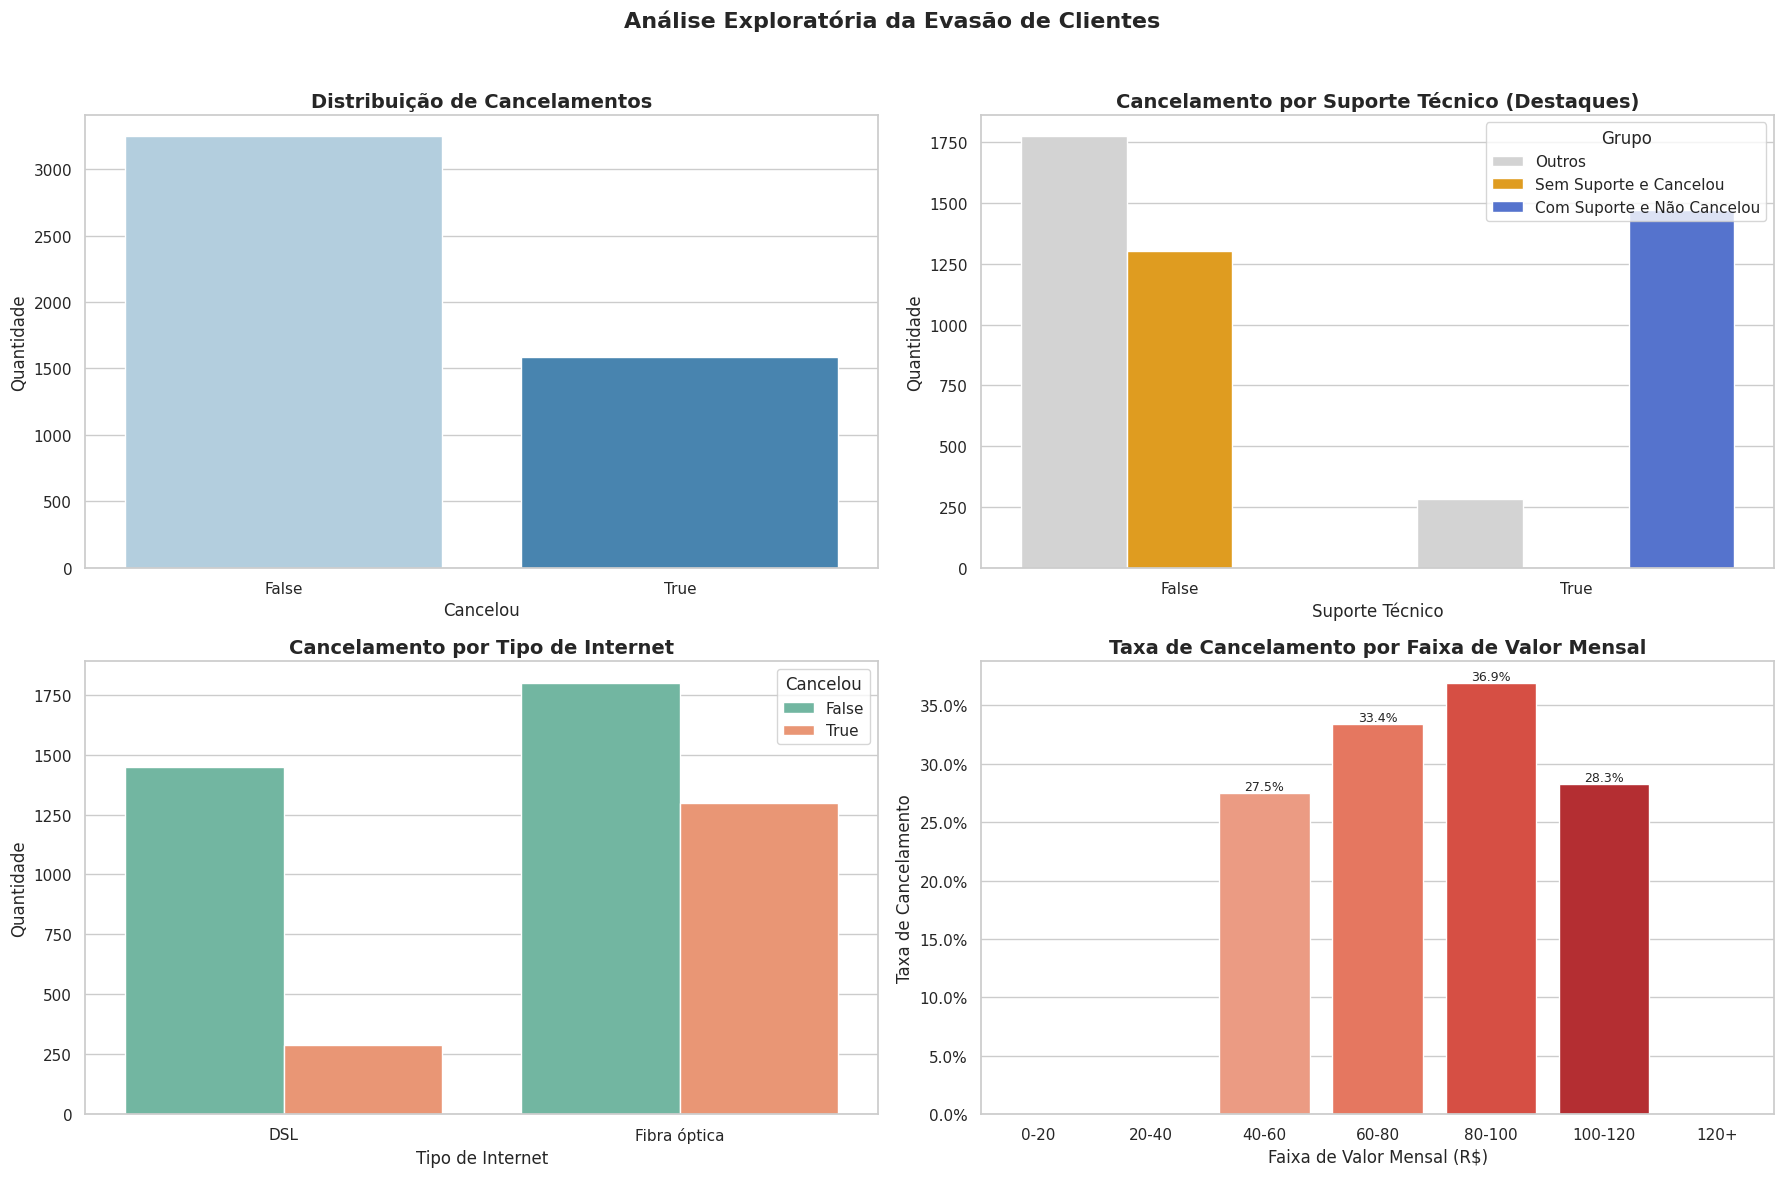

In [97]:
import matplotlib.ticker as mtick
# Gr√°fico 1 ‚Äì N√∫mero de Evas√£o Total
numero_evasao = df_normalizado['cancelou'].value_counts()

# Gr√°fico 2 ‚Äì Evas√£o por Suporte T√©cnico
numero_evasao_tecnico = (
    df_normalizado
    .groupby(['suporte_tecnico', 'cancelou'])
    .size()
    .reset_index(name='quantidade')
)

# Gr√°fico 3 ‚Äì Evas√£o por Tipo de Internet
numero_evasao_internet = (
    df_normalizado
    .groupby(['tipo_internet', 'cancelou'])
    .size()
    .reset_index(name='quantidade')
)

# Gr√°fico 4 ‚Äì Taxa de Cancelamento por Faixa de Valor Mensal

# Definir as faixas (bins)
bins = [0, 20, 40, 60, 80, 100, 120]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-120', '120+']

df_normalizado['faixa_valor_mensal'] = pd.cut(df_normalizado['valor_mensal'], bins=bins + [df_normalizado['valor_mensal'].max() if df_normalizado['valor_mensal'].max() > bins[-1] else bins[-1] + 1], labels=labels, right=False)

taxa_evasao = (
    df_normalizado
    .groupby('faixa_valor_mensal')
    .agg(total_clientes=('cancelou', 'count'),
         total_cancelamentos=('cancelou', 'sum'))
    .assign(taxa_cancelamento=lambda x: x['total_cancelamentos'] / x['total_clientes'])
    .reset_index()
)

# Estilo
sns.set(style='whitegrid')

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Gr√°fico (0,0): N√∫mero de Evas√£o
sns.barplot(ax=axes[0, 0], x=numero_evasao.index, y=numero_evasao.values, palette='Blues', hue=numero_evasao.index, legend=False)
axes[0, 0].set_title('Distribui√ß√£o de Cancelamentos', fontsize=14, weight='bold')
axes[0, 0].set_xlabel('Cancelou')
axes[0, 0].set_ylabel('Quantidade')


# Gr√°fico (0,1): Evas√£o por Suporte T√©cnico

# Criar coluna combinada de categorias
numero_evasao_tecnico['grupo'] = numero_evasao_tecnico.apply(
    lambda row: 'Sem Suporte e Cancelou' if (row['suporte_tecnico'] == False and row['cancelou'] == True)
    else 'Com Suporte e N√£o Cancelou' if (row['suporte_tecnico'] == True and row['cancelou'] == False)
    else 'Outros',
    axis=1
)

# Definir cores personalizadas
cores_personalizadas = {
    'Sem Suporte e Cancelou': 'orange',
    'Com Suporte e N√£o Cancelou': 'royalblue',
    'Outros': 'lightgray'
}

# Plot
sns.barplot(
    ax=axes[0, 1],
    data=numero_evasao_tecnico,
    x='suporte_tecnico',
    y='quantidade',
    hue='grupo',
    palette=cores_personalizadas
)

axes[0, 1].set_title('Cancelamento por Suporte T√©cnico (Destaques)', fontsize=14, weight='bold')
axes[0, 1].set_xlabel('Suporte T√©cnico')
axes[0, 1].set_ylabel('Quantidade')
axes[0, 1].legend(title='Grupo', loc='upper right')

# Gr√°fico (1,0): Evas√£o por Tipo de Internet
sns.barplot(
    ax=axes[1, 0],
    data=numero_evasao_internet,
    x='tipo_internet',
    y='quantidade',
    hue='cancelou',
    palette='Set2'
)
axes[1, 0].set_title('Cancelamento por Tipo de Internet', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Tipo de Internet')
axes[1, 0].set_ylabel('Quantidade')
axes[1, 0].legend(title='Cancelou', loc='upper right')

# Gr√°fico (1,1): Taxa de Cancelamento por Faixa de Valor
sns.barplot(
    ax=axes[1, 1],
    data=taxa_evasao,
    x='faixa_valor_mensal',
    y='taxa_cancelamento',
    palette='Reds'
)
axes[1, 1].set_title('Taxa de Cancelamento por Faixa de Valor Mensal', fontsize=14, weight='bold')
axes[1, 1].set_xlabel('Faixa de Valor Mensal (R$)')
axes[1, 1].set_ylabel('Taxa de Cancelamento')
axes[1, 1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
for p in axes[1, 1].patches:
    height = p.get_height()
    axes[1, 1].annotate(f'{height:.1%}', (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=9)

plt.suptitle('An√°lise Explorat√≥ria da Evas√£o de Clientes', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig('subplots.png')

plt.show()

In [86]:
numero_evasao_vinculo = (df_normalizado.groupby(['meses_de_vinculo', 'cancelou']).size().reset_index(name='quantidade'))

fig = px.bar(
    numero_evasao_vinculo,
    x='meses_de_vinculo',
    y='quantidade',
    color='cancelou',
    barmode='group',
    labels={
        'meses_de_vinculo': 'Meses de V√≠nculo',
        'quantidade': 'Quantidade de Clientes',
        'cancelou': 'Cancelou'
    },
    title='N√∫mero de Evas√µes por Meses de V√≠nculo',
    color_discrete_map={True: 'red', False: 'green'}
)

fig.update_layout(
    xaxis_title='Meses de V√≠nculo',
    yaxis_title='Quantidade de Clientes',
    legend_title='Cancelou'
)

fig.show()

In [87]:
df_taxa_evasao = (
    df_normalizado
    .groupby('meses_de_vinculo')
    .agg(
        total_clientes=('cancelou', 'count'),
        total_cancelamentos=('cancelou', 'sum')
    )
    .assign(
        taxa_cancelamento=lambda x: x['total_cancelamentos'] / x['total_clientes']
    )
    .reset_index()
)


In [88]:
import plotly.graph_objects as go

# Agrupando os dados
df_multi = (
    df_normalizado
    .groupby('meses_de_vinculo')
    .agg(
        total_cancelamentos=('cancelou', 'sum'),
        total_clientes=('cancelou', 'count'),
        valor_medio_mensal=('valor_mensal', 'mean')
    )
    .assign(
        taxa_cancelamento=lambda x: x['total_cancelamentos'] / x['total_clientes']
    )
    .reset_index()
)

fig = go.Figure()

# Linha taxa de cancelamento (eixo y esquerdo)
fig.add_trace(go.Scatter(
    x=df_multi['meses_de_vinculo'],
    y=df_multi['taxa_cancelamento'],
    mode='lines+markers',
    name='Taxa de Cancelamento (%)',
    yaxis='y1',
    line=dict(color='red')
))

# Linha valor m√©dio mensal (eixo y direito)
fig.add_trace(go.Scatter(
    x=df_multi['meses_de_vinculo'],
    y=df_multi['valor_medio_mensal'],
    mode='lines+markers',
    name='Valor M√©dio Mensal (R$)',
    yaxis='y2',
    line=dict(color='green')
))

# Layout com dois eixos y
fig.update_layout(
    title='Taxa de Cancelamento e Valor M√©dio Mensal por Tempo de V√≠nculo',
    xaxis=dict(
        title='Meses de V√≠nculo',
        range=[df_multi['meses_de_vinculo'].min(), df_multi['meses_de_vinculo'].max()] # Moved range inside xaxis dict
    ),

    yaxis=dict(
        title='Taxa de Cancelamento (%)',
        tickformat='.0%',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        side='left',
        range=[df_multi['taxa_cancelamento'].min(), df_multi['taxa_cancelamento'].max()]
    ),

    yaxis2=dict(
        title='Valor M√©dio Mensal (R$)',
        titlefont=dict(color='green'),
        tickfont=dict(color='green'),
        anchor='x',
        overlaying='y',
        side='right',
        range=[df_multi['valor_medio_mensal'].min(), df_multi['valor_medio_mensal'].max()]
    ),

    legend=dict(x=0.01, y=0.99),
    hovermode='x unified',
    margin=dict(r=60)
)

fig.show()

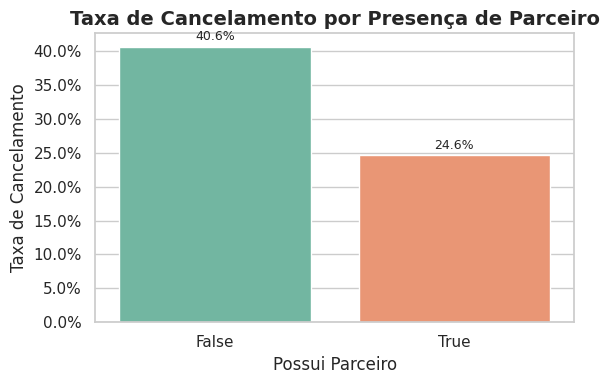

In [89]:
taxa_parceiro = (
    df_normalizado.groupby('possui_parceiro')['cancelou']
    .mean()
    .reset_index(name='taxa_cancelamento')
)

plt.figure(figsize=(6, 4))
sns.barplot(data=taxa_parceiro, x='possui_parceiro', y='taxa_cancelamento', palette='Set2', hue='possui_parceiro', legend=False)
plt.title('Taxa de Cancelamento por Presen√ßa de Parceiro', fontsize=14, weight='bold')
plt.xlabel('Possui Parceiro')
plt.ylabel('Taxa de Cancelamento')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for index, row in taxa_parceiro.iterrows():
    plt.text(index, row['taxa_cancelamento'] + 0.01, f'{row["taxa_cancelamento"]:.1%}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('taxa_parceiro.png')
plt.show()



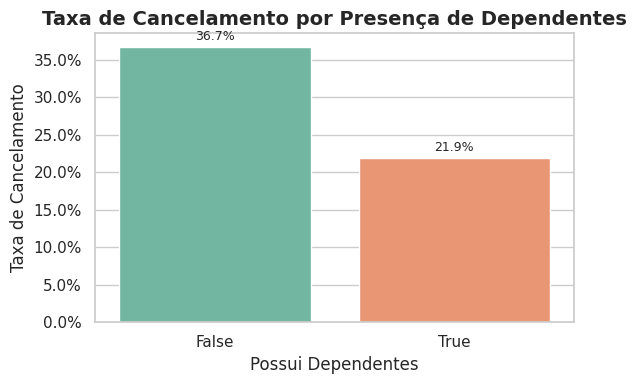

In [90]:
taxa_dependente = (
    df_normalizado.groupby('possui_dependentes')['cancelou']
    .mean()
    .reset_index(name='taxa_cancelamento')
)

plt.figure(figsize=(6, 4))
sns.barplot(data=taxa_dependente, x='possui_dependentes', y='taxa_cancelamento', palette='Set2', hue='possui_dependentes', legend=False)
plt.title('Taxa de Cancelamento por Presen√ßa de Dependentes', fontsize=14, weight='bold')
plt.xlabel('Possui Dependentes')
plt.ylabel('Taxa de Cancelamento')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for index, row in taxa_dependente.iterrows():
    plt.text(index, row['taxa_cancelamento'] + 0.01, f'{row["taxa_cancelamento"]:.1%}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('taxa_dependentes.png')
plt.show()


In [91]:
servicos = [
    'seguranca_online',
    'backup_online',
    'protecao_dispositivo',
    'suporte_tecnico',
    'streaming_tv',
    'streaming_filmes'
]

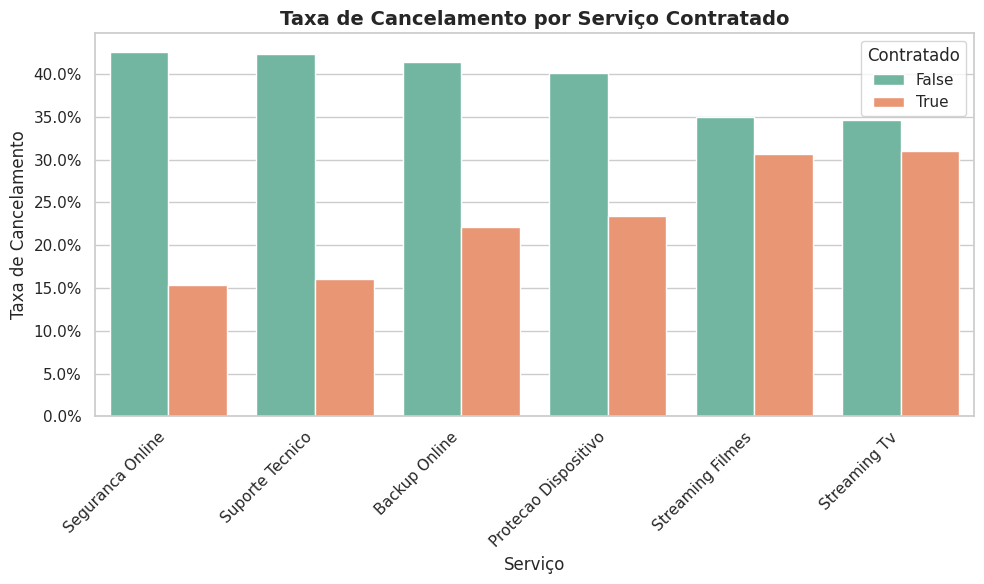

In [92]:
# Preparar dados
taxas_servicos = []

for servico in servicos:
    temp = (
        df_normalizado.groupby(servico)['cancelou']
        .mean()
        .reset_index()
        .rename(columns={servico: 'contratado'})
    )
    temp['servico'] = servico
    taxas_servicos.append(temp)

taxas_servicos_df = pd.concat(taxas_servicos).sort_values(by='cancelou', ascending=False)

# Renomear para exibi√ß√£o mais amig√°vel (opcional)
taxas_servicos_df['servico'] = taxas_servicos_df['servico'].str.replace('_', ' ').str.title()

# Gr√°fico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=taxas_servicos_df,
    x='servico',
    y='cancelou',
    hue='contratado',
    palette='Set2'
)
plt.title('Taxa de Cancelamento por Servi√ßo Contratado', fontsize=14, weight='bold')
plt.xlabel('Servi√ßo')
plt.ylabel('Taxa de Cancelamento')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend(title='Contratado')
plt.tight_layout()
plt.savefig('taxa_servicos.png')
plt.show()


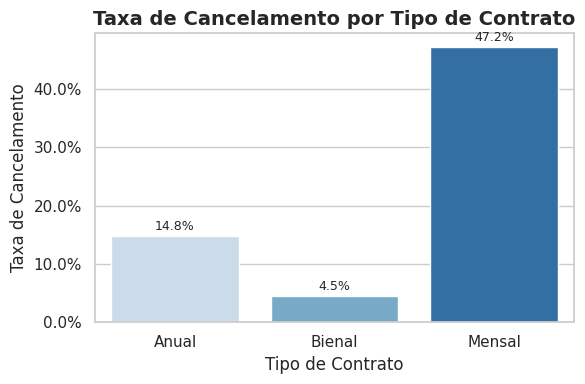

In [93]:
# Agrupar e calcular taxa
taxa_contrato = (
    df_normalizado.groupby('tipo_contrato')['cancelou']
    .mean()
    .reset_index(name='taxa_cancelamento')
)

# Gr√°fico
plt.figure(figsize=(6, 4))
sns.barplot(data=taxa_contrato, x='tipo_contrato', y='taxa_cancelamento', palette='Blues', hue='tipo_contrato', legend=False)
plt.title('Taxa de Cancelamento por Tipo de Contrato', fontsize=14, weight='bold')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Taxa de Cancelamento')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# R√≥tulos
for i, row in taxa_contrato.iterrows():
    plt.text(i, row['taxa_cancelamento'] + 0.01, f'{row["taxa_cancelamento"]:.1%}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('taxa_contrato.png')
plt.show()


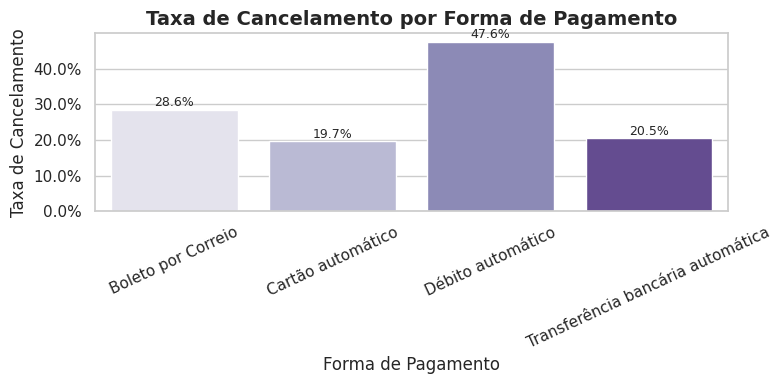

In [94]:
# Agrupar e calcular taxa
taxa_pagamento = (
    df_normalizado.groupby('forma_pagamento')['cancelou']
    .mean()
    .reset_index(name='taxa_cancelamento')
)


# Gr√°fico
plt.figure(figsize=(8, 4))
sns.barplot(data=taxa_pagamento, x='forma_pagamento', y='taxa_cancelamento', palette='Purples', hue='forma_pagamento', legend=False)
plt.title('Taxa de Cancelamento por Forma de Pagamento', fontsize=14, weight='bold')
plt.xlabel('Forma de Pagamento')
plt.ylabel('Taxa de Cancelamento')
plt.xticks(rotation=25)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for i, row in taxa_pagamento.iterrows():
    plt.text(i, row['taxa_cancelamento'] + 0.01, f'{row["taxa_cancelamento"]:.1%}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('taxa_pagamento.png')
plt.show()


In [95]:
# Correla√ß√£o
correlacao_conta_diaria = df_normalizado[['ContaDiaria', 'cancelou']].corr().iloc[0, 1]
print(f"Correla√ß√£o entre Conta Di√°ria e Cancelamento: {correlacao_conta_diaria:.2f}")


Correla√ß√£o entre Conta Di√°ria e Cancelamento: 0.02


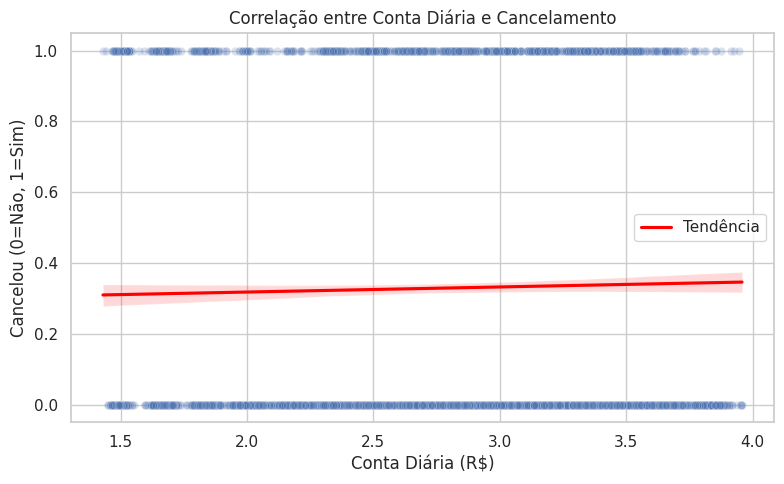

In [96]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_normalizado, x='ContaDiaria', y='cancelou', alpha=0.2)
sns.regplot(data=df_normalizado, x='ContaDiaria', y='cancelou', scatter=False, color='red', label='Tend√™ncia')
plt.title('Correla√ß√£o entre Conta Di√°ria e Cancelamento')
plt.xlabel('Conta Di√°ria (R$)')
plt.ylabel('Cancelou (0=N√£o, 1=Sim)')
plt.legend()
plt.tight_layout()
plt.savefig('correlacao_conta_diaria.png')
plt.show()


#üìÑRelatorio Final

**Introdu√ß√£o**

O objetivo desta an√°lise foi identificar os principais fatores relacionados √† evas√£o (churn) de clientes da empresa TelecomX. A empresa observou uma alta taxa de cancelamento dos servi√ßos, atingindo cerca de metade da sua base de clientes. Por isso, buscou-se compreender os padr√µes e vari√°veis que mais contribuem para esse fen√¥meno, com o intuito de apoiar estrat√©gias de reten√ß√£o.


**Limpeza e Tratamento de Dados**

O conjunto de dados foi inicialmente fornecido no formato JSON, exigindo a transforma√ß√£o para um DataFrame pandas. Isso envolveu:

* Convers√£o de colunas compostas por dicion√°rios em colunas planas.

* Remo√ß√£o de valores duplicados e de valores ausentes (NaN).

* Padroniza√ß√£o de valores mal digitados como 'nan' (string).

* Tradu√ß√£o dos nomes das colunas e dos dados categ√≥ricos para o portugu√™s facilitando a interpreta√ß√£o.

* Convers√£o de vari√°veis booleanas ("Yes"/"No") para True/False.

* Cria√ß√£o de novas vari√°veis auxiliares como:

  * ContaDiaria (valor mensal dividido pelos dias do m√™s).

  * faixa_valor_mensal (agrupamento em bins).

  * total_servicos (quantidade de servi√ßos contratados).


**An√°lise Explorat√≥ria de Dados**

A etapa explorat√≥ria incluiu gr√°ficos de barra, dispers√£o e linha, visando relacionar o churn com diferentes vari√°veis. Os principais achados foram:

* A quantidade de churns foi significativa, com quase 30% da base tendo cancelado.

* Clientes sem suporte t√©cnico ou seguran√ßa online apresentaram maior probabilidade de cancelamento.

* O tipo de internet "Fibra √ìptica" concentrou mais cancelamentos em compara√ß√£o a tecnologias mais antigas, como o DSL.

* Clientes mais novos (com menos meses de v√≠nculo) demonstraram maior tend√™ncia ao churn.

* N√£o houve evid√™ncia de correla√ß√£o significativa entre o valor da conta di√°ria e o cancelamento.

* Quanto maior o n√∫mero de servi√ßos contratados, menor a chance de evas√£o.

* A forma de pagamento por d√©bito autom√°tico esteve associada a taxas mais altas de cancelamento.

* O tipo de contrato mensal tamb√©m apresentou maior taxa de churn.

* N√£o foram encontradas diferen√ßas relevantes de cancelamento com base no g√™nero.

* Clientes sem parceiro(a) cancelaram mais, enquanto quem possu√≠a dependentes permaneceu mais tempo.


**Conclus√µes e Insights**

A evas√£o de clientes est√° fortemente relacionada √† percep√ß√£o de suporte e seguran√ßa. Clientes que n√£o contrataram servi√ßos como seguran√ßa online, backup ou suporte t√©cnico apresentaram maiores √≠ndices de cancelamento. Al√©m disso, clientes com poucos meses de v√≠nculo (novatos) tendem a abandonar mais cedo, o que pode indicar problemas na experi√™ncia inicial com o servi√ßo.

Outro achado importante √© a alta evas√£o entre usu√°rios de fibra √≥ptica, o que pode estar relacionado a falhas de implementa√ß√£o ou √† fase de transi√ß√£o tecnol√≥gica. Modelos de contrato e forma de pagamento tamb√©m influenciam diretamente o comportamento de sa√≠da.



